# Imports

In [1]:
#setting a random Seed
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

#Pointing custom import path taken from #https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
import sys
sys.path.append('../modules/')
import eda
import matplotlib.pyplot as plt


# Loading in data

In [2]:
#specify if we want to use the train data or test data
train_dataset = 'Training'

In [3]:
train_folders = eda.folders(train_dataset)
train_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 1321 files


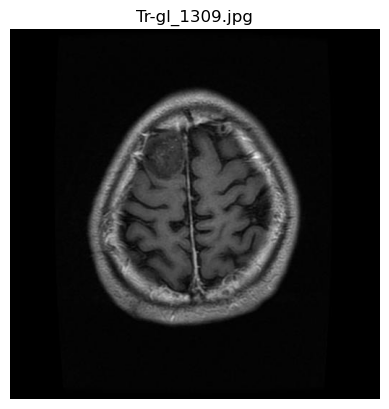

meningioma has 1339 files


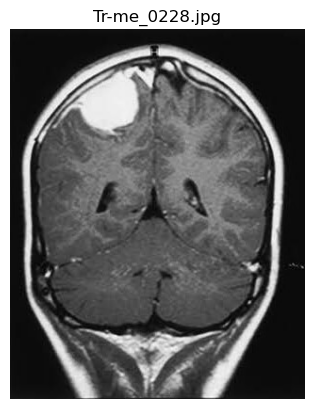

notumor has 1595 files


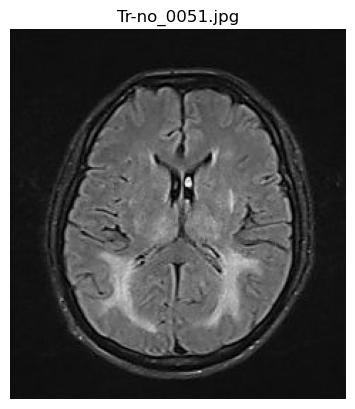

pituitary has 1457 files


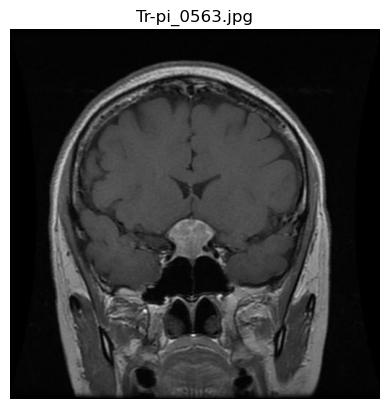

In [4]:
eda.image_len(train_folders)

In [5]:
test_dataset = 'Testing'

In [6]:
test_folders = eda.folders(test_dataset)
test_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 300 files


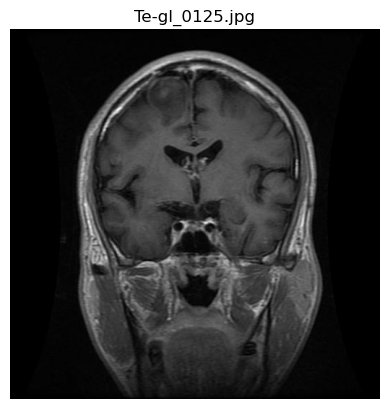

meningioma has 306 files


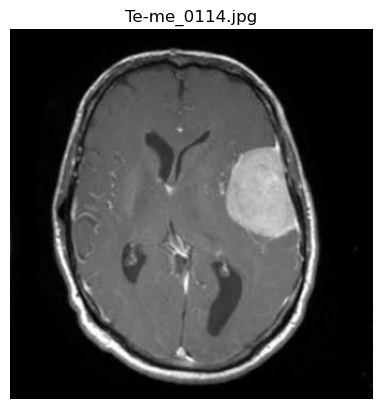

notumor has 405 files


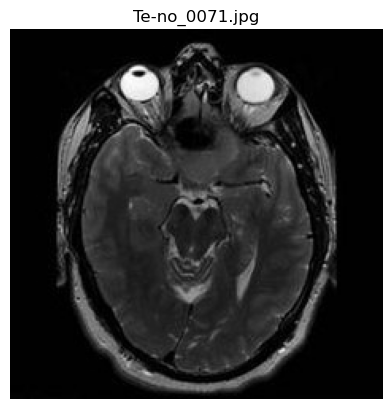

pituitary has 300 files


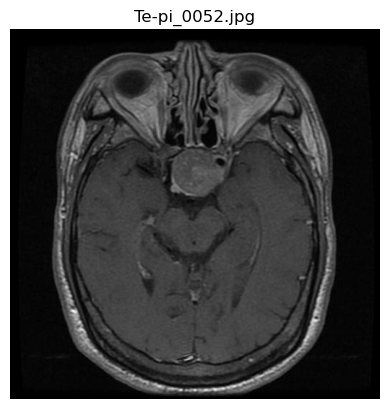

In [7]:
eda.image_len(test_folders, 'Testing')

# Average pixel value
This portion re-uses code from a previous [project](https://github.com/DerikVo/DSI_project_4_plant_disease/blob/main/notebooks/01_Potato_PlantVillageEDA.ipynb). The code was originally developed by chat GPT 4 with the prompt:  "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras." The code has since been corrected, adapted, and changed into a custom module for this project.

In [8]:
notumor = eda.avg_images('notumor')

pituitary_tumor  = eda.avg_images('Pituitary')

meningioma_tumor = eda.avg_images('meningioma')

glioma_tumor = eda.avg_images('glioma')

Found 1595 images belonging to 1 classes.
Found 1457 images belonging to 1 classes.
Found 1339 images belonging to 1 classes.
Found 1321 images belonging to 1 classes.


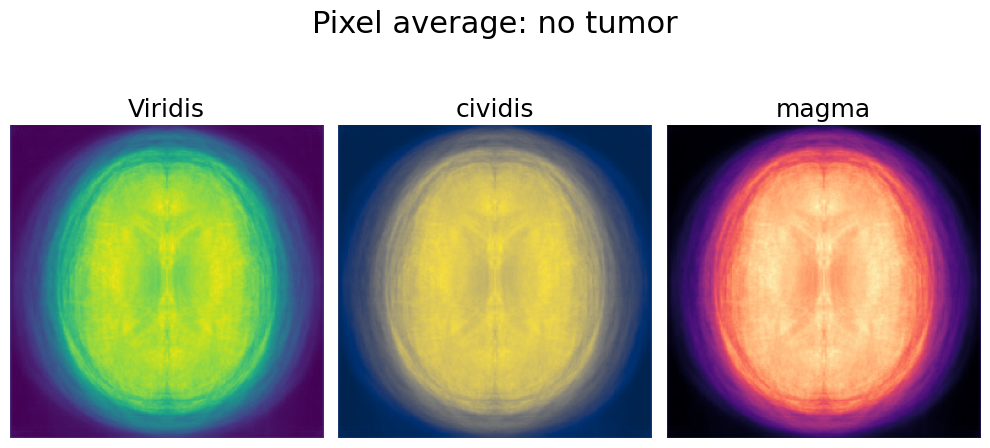

In [9]:
eda.display_image(notumor, 'no tumor')

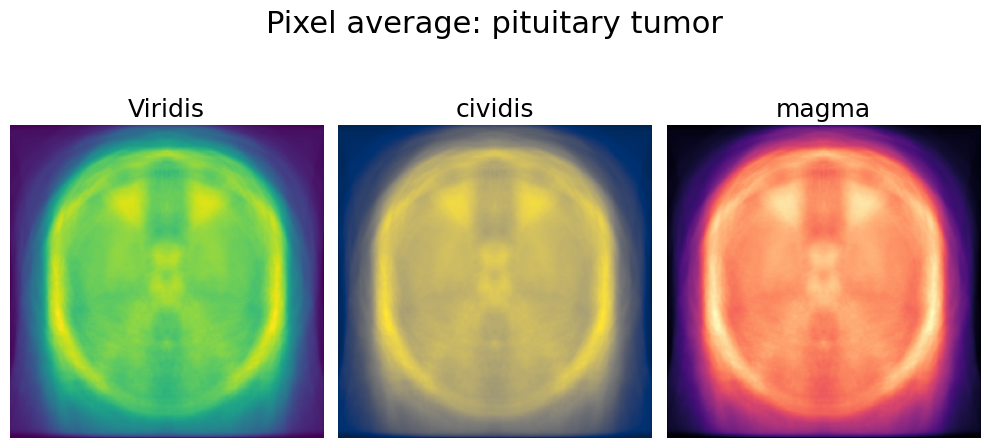

In [10]:
eda.display_image(pituitary_tumor, 'pituitary tumor')

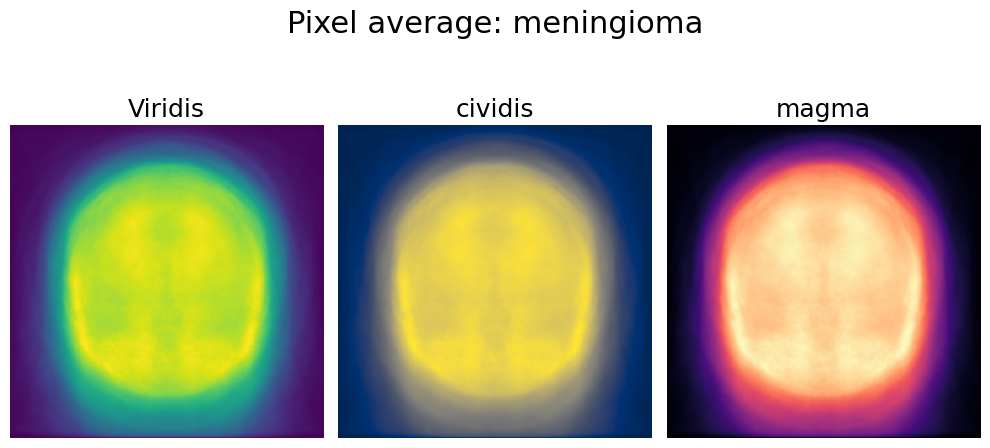

In [11]:
eda.display_image(meningioma_tumor, 'meningioma')

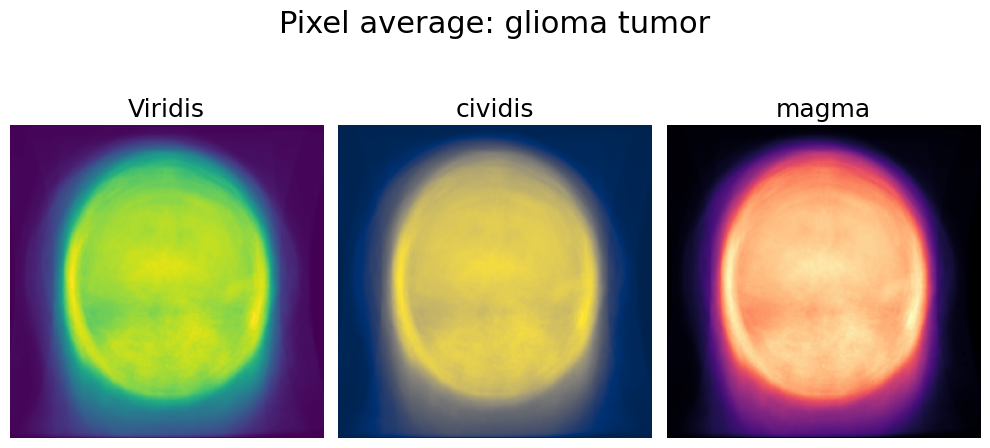

In [12]:
eda.display_image(glioma_tumor, 'glioma tumor')

As we can see there is a clear difference between each class of images here.

# Examine contrast difference between a brain with and without a tumor
This portion displays 3 of the same images to support varying levels of colorblindness: Such as protanopia, deuteranopia, and tritanopia.

# Creating a function for contrast

In [13]:
glioma_contrast = eda.image_contrast(glioma_tumor, notumor)
pituitary_contrast = eda.image_contrast(pituitary_tumor, notumor)
meningioma_contrast = eda.image_contrast(meningioma_tumor, notumor)

This portion will display the same contrast using 3 different color maps to support those with colorblindness.

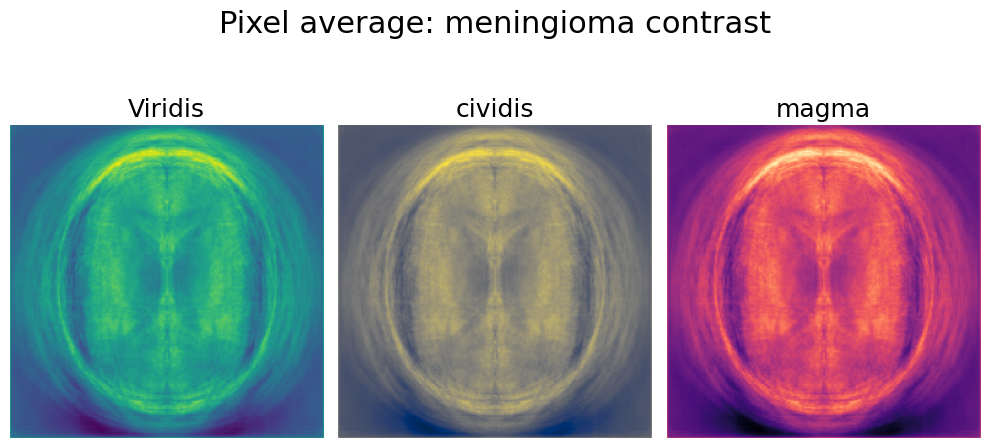

In [14]:
eda.display_image(meningioma_contrast, 'meningioma contrast')

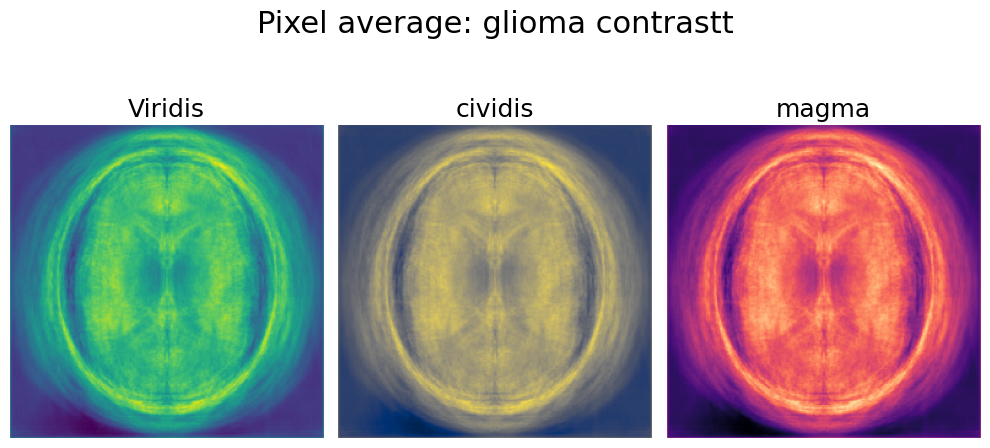

In [15]:
eda.display_image(glioma_contrast, 'glioma contrastt')

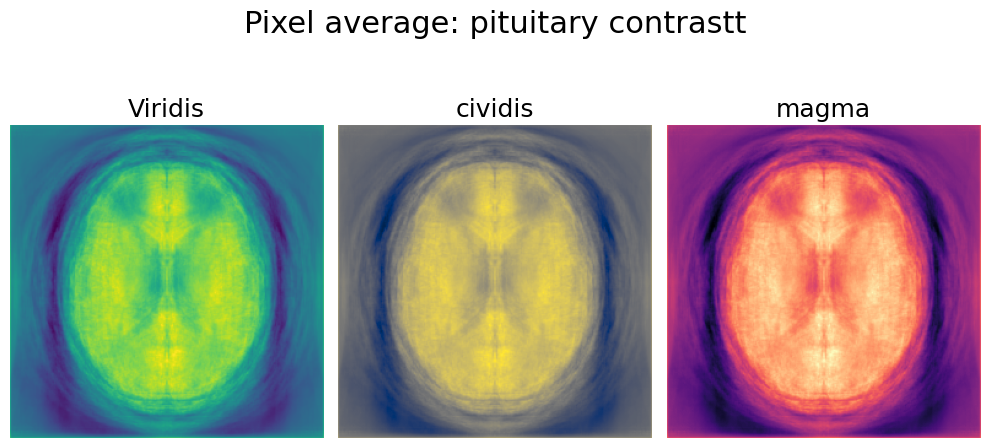

In [16]:
eda.display_image(pituitary_contrast, 'pituitary contrastt')